In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.shape

(1048575, 11)

In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


CHECK FOR CORRELATION

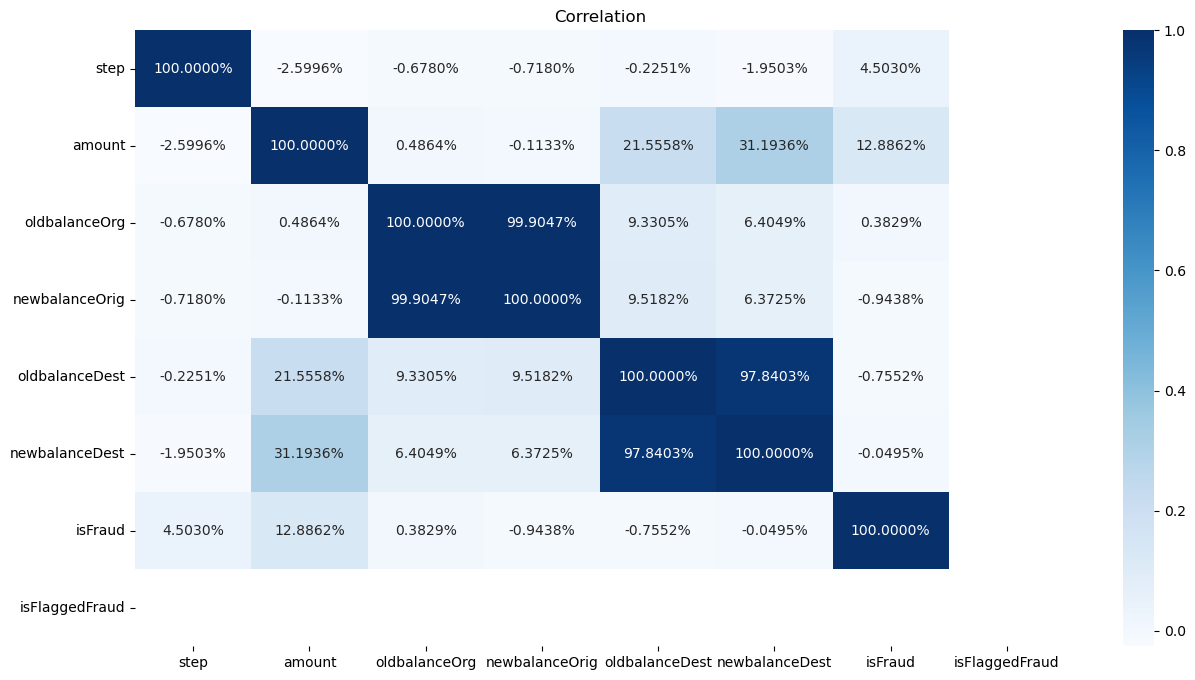

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only= True), cmap='Blues',fmt='.4%', annot=True)
plt.title('Correlation')
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = {}
for i in df.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    df[i] = encoder[i].fit_transform(df[i])

In [10]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,125164,170136.0,160296.36,274917,0.0,0.0,0,0
1,1,3,1864.28,361319,21249.0,19384.72,286716,0.0,0.0,0,0
2,1,4,181.00,165236,181.0,0.00,73550,0.0,0.0,1,0
3,1,1,181.00,961662,181.0,0.00,65464,21182.0,0.0,1,0
4,1,3,11668.14,567915,41554.0,29885.86,138001,0.0,0.0,0,0


In [11]:
x = df.drop(columns=['isFraud'])
y = df['isFraud']

In [12]:
y.value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_pred = log_reg.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[314210,     30],
       [   206,    127]], dtype=int64)

In [23]:
accuracy_score(y_test, y_pred)

0.9992497766814062

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314240
           1       0.81      0.38      0.52       333

    accuracy                           1.00    314573
   macro avg       0.90      0.69      0.76    314573
weighted avg       1.00      1.00      1.00    314573



In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

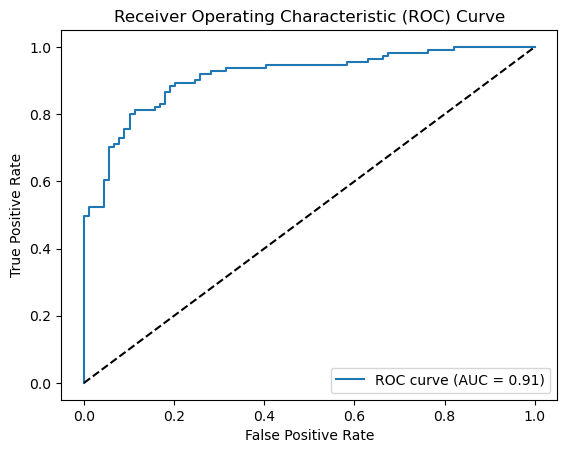

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [51]:
pip install pandoc

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 127.0/127.0 kB 1.5 MB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33290 sha256=111331712c4e119081363a6aac937cdda8c0f05d57e2559ee66266bdbc06ff78
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\df\68\e2\574df0737a398965be3a1977499bbda7a841a4605d8dda34d2
Successfully built pandoc
Note: you may need to restart the kernel to use updated packages.
